In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df=pd.read_csv('fifa.csv')

In [3]:
drop_feature=['player_url', 'short_name','ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'long_name', 'dob', 'height_cm','nationality', 'club','value_eur', 'wage_eur','sofifa_id','potential','overall','skill_moves','player_positions','weak_foot','player_traits','joined','contract_valid_until','nation_position','nation_jersey_number','body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from']

In [4]:
df.drop(drop_feature,axis=1,inplace=True)

In [5]:
df.head()

,age,weight_kg,preferred_foot,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,72,Left,5,Medium/Low,87.0,92.0,92.0,96.0,39.0,...,75,96,33,37,26,6,11,15,14,8
1,34,83,Right,5,High/Low,90.0,93.0,82.0,89.0,35.0,...,85,95,28,32,24,7,11,15,14,11
2,27,68,Right,5,High/Medium,91.0,85.0,87.0,95.0,32.0,...,90,94,27,26,29,9,9,15,15,11
3,26,87,Right,3,Medium/Medium,NaN,NaN,NaN,NaN,NaN,...,11,68,27,12,18,87,92,78,90,89
4,28,74,Right,4,High/Medium,91.0,83.0,86.0,94.0,35.0,...,88,91,34,27,22,11,12,6,8,8


In [6]:
list_nan=['weight_kg', 'international_reputation',
       'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','physic']

In [7]:
def imput_nan(df,variable):
    age=df['age']
    df[variable]=df[variable].fillna(age)

In [8]:
for i in df[list_nan]:
    imput_nan(df,i)

In [9]:
odinal={
    'Medium/Low':4, 'High/Low':7, 'High/Medium':8, 'Medium/Medium':5,
       'High/High':9, 'Medium/High':6, 'Low/High':3, 'Low/Medium':2, 'Low/Low':1}
df['work_rate_encoded']=df['work_rate'].map(odinal)
df.preferred_foot=pd.get_dummies(df.preferred_foot)
df.drop(['work_rate'],axis=1,inplace=True)

In [10]:
df.work_rate_encoded

0        4
1        7
2        8
3        5
4        8
5        9
6        5
7        5
8        9
9        8
10       7
11       6
12       9
13       5
14       5
15       6
16       6
17       8
18       8
19       8
20       8
21       5
22       9
23       5
24       8
25       5
26       8
27       9
28       5
29       8
        ..
18248    5
18249    4
18250    5
18251    5
18252    5
18253    5
18254    5
18255    5
18256    5
18257    5
18258    4
18259    5
18260    5
18261    5
18262    2
18263    5
18264    5
18265    5
18266    5
18267    5
18268    5
18269    5
18270    5
18271    5
18272    5
18273    6
18274    5
18275    2
18276    1
18277    5
Name: work_rate_encoded, Length: 18278, dtype: int64

In [11]:
df=df.replace(['^\d.'],'',regex=True).astype('int64')

In [12]:
defending_feature=['goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning']
attaking_features=['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys',]
midfiled_features=['skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
mentality_player=['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking']


In [13]:
def feature_reduction(df,variable,features_list):
    df[variable]=df[features_list].sum(axis=1)
    avg=df[features_list].columns.value_counts().sum()
    df[variable]=df[variable]/avg

In [14]:
feature_reduction(df,'Midfiled',midfiled_features)
feature_reduction(df,'Attack',attaking_features)
feature_reduction(df,'Defence',defending_feature)
feature_reduction(df,'Mentality',mentality_player)

In [15]:
drop_ff=[ 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
df.drop(drop_ff,axis=1,inplace=True)

In [16]:
import seaborn as sns
dd=df.corr()
dff=pd.DataFrame(dd,columns=df.columns)

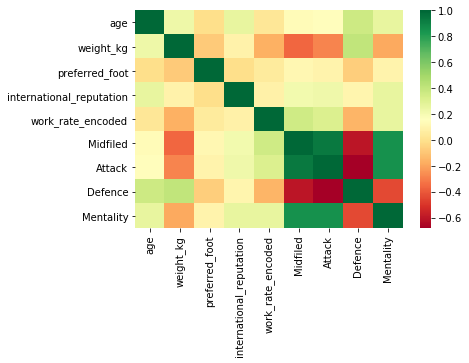

In [17]:
sns.heatmap(dff,cmap="RdYlGn")



In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
x=np.array(df.drop('international_reputation',axis=1))
y=np.array(df['international_reputation'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy',
 max_depth= 11,
 max_features= 2,
 n_estimators= 488)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9321663019693655

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

In [20]:
import optuna
def objective(trials):
    criterion=trials.suggest_categorical('criterion',['gini','entropy'])
    max_depth=trials.suggest_int('max_depth',10,1200,log=True)
    max_features=trials.suggest_int('max_features',2,5,6)
    n_estimators=trials.suggest_int('n_estimators',100,500)
    rf=RandomForestClassifier(n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,max_features=max_features)
    score = cross_val_score(rf, x_train,y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

opt = optuna.create_study(direction="maximize")
opt.optimize(objective, n_trials=15)

ModuleNotFoundError: No module named 'optuna'

In [ ]:
opt.best_params